### Imports

In [59]:
import pandas as pd
import numpy as np
import sklearn.linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

### Load the data

In [2]:
df = pd.read_csv('battle_royale_train.csv')

In [3]:
df.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.11432,0.0,8.56,0.0,0.52,6.781,71.3,2.8561,5.0,384.0,20.9,395.58,7.67,26.5
1,0.22876,0.0,8.56,0.0,0.52,6.405,85.4,2.7147,5.0,384.0,20.9,70.80,10.63,18.6
2,0.21161,0.0,8.56,0.0,0.52,6.137,87.4,2.7147,5.0,384.0,20.9,394.47,13.44,19.3
3,0.13960,0.0,8.56,0.0,0.52,6.167,90.0,2.4210,5.0,384.0,20.9,392.69,12.33,20.1


### EDA

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,405.000000,405.000000,405.000000,405.00000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,4.444356,11.139506,12.246370,0.08642,0.575367,6.295943,71.589630,3.456263,10.940741,437.617284,18.391605,349.511481,13.125284,22.575802
std,9.432882,23.452837,7.084331,0.28133,0.118722,0.746200,27.539533,2.112670,9.196235,175.020223,2.262507,99.883774,7.393056,9.851235
min,0.009060,0.000000,0.460000,0.00000,0.385000,3.561000,6.800000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.096040,0.000000,5.860000,0.00000,0.488000,5.877000,49.700000,1.951200,4.000000,293.000000,16.900000,370.310000,7.190000,16.200000
50%,0.369200,0.000000,11.930000,0.00000,0.575000,6.226000,82.900000,2.640300,5.000000,398.000000,19.100000,390.550000,12.120000,21.000000
75%,5.581070,0.000000,18.100000,0.00000,0.668000,6.649000,95.400000,4.354900,24.000000,666.000000,20.200000,395.690000,17.440000,26.200000
max,88.976200,95.000000,27.740000,1.00000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

<b> Correlation Heatmap</b>

In [7]:
def half_masked_corr_heatmap(dataframe, title=None, file=None):
    plt.figure(figsize=(9,9))
    sns.set(font_scale=1)

    mask = np.zeros_like(dataframe.corr())
    mask[np.triu_indices_from(mask)] = True

    with sns.axes_style("white"):
        sns.heatmap(dataframe.corr(), mask=mask, annot=True, cmap='coolwarm')

    if title: plt.title(f'\n{title}\n', fontsize=18)
    plt.xlabel('')    # optional in case you want an x-axis label
    plt.ylabel('')    # optional in case you want a  y-axis label
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return

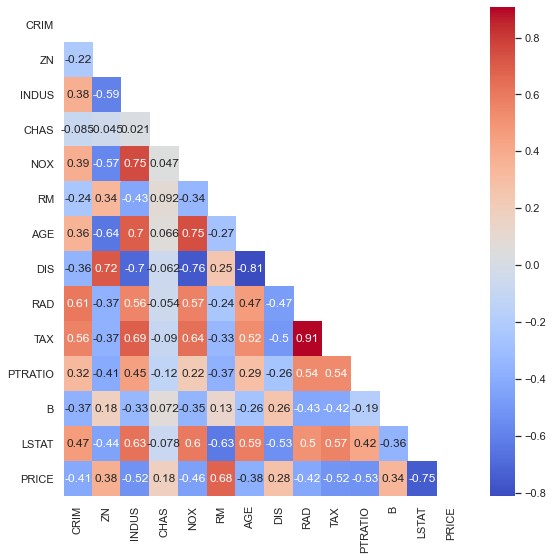

In [8]:
half_masked_corr_heatmap(df)

<b> Correlation to target variable </b>

In [9]:
def corr_to_target(dataframe, target, title=None, file=None):
    plt.figure(figsize=(4,6))
    sns.set(font_scale=1)
    
    sns.heatmap(dataframe.corr()[[target]].sort_values(target,
                                                ascending=False)[1:],
                annot=True,
                cmap='coolwarm')
    
    if title: plt.title(f'\n{title}\n', fontsize=18)
    plt.xlabel('')    # optional in case you want an x-axis label
    plt.ylabel('')    # optional in case you want a  y-axis label
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return

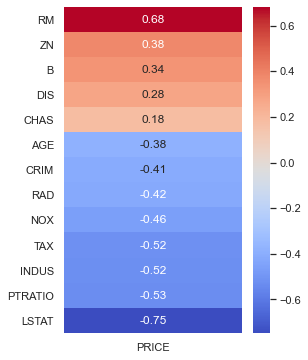

In [10]:
corr_to_target(df, 'PRICE')

<b> Scatterplots to target variable </b>

In [11]:
def gen_scatterplots(dataframe, target_column, list_of_columns, cols=1, file=None):
    rows      = math.ceil(len(list_of_columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows

    fig, ax = plt.subplots(nrows   = rows,
                           ncols   = cols,
                           figsize = (figwidth, figheight))
    
    color_choices = ['blue', 'grey', 'goldenrod', 'r', 'black', 'darkorange', 'g']

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel()         # Ravel turns a matrix into a vector... easier to iterate

    for i, column in enumerate(list_of_columns):
        ax[i].scatter(dataframe[column],
                      dataframe[target_column],
                      color=color_choices[i % len(color_choices)],
                      alpha = 0.1)

#           Individual subplot titles, optional
#             ax[i].set_title(f'{column} vs. {target_column}', fontsize=18)

        ax[i].set_ylabel(f'{target_column}', fontsize=14)
        ax[i].set_xlabel(f'{column}', fontsize=14)

    fig.suptitle('\nEach Feature vs. Target Scatter Plots', size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    return

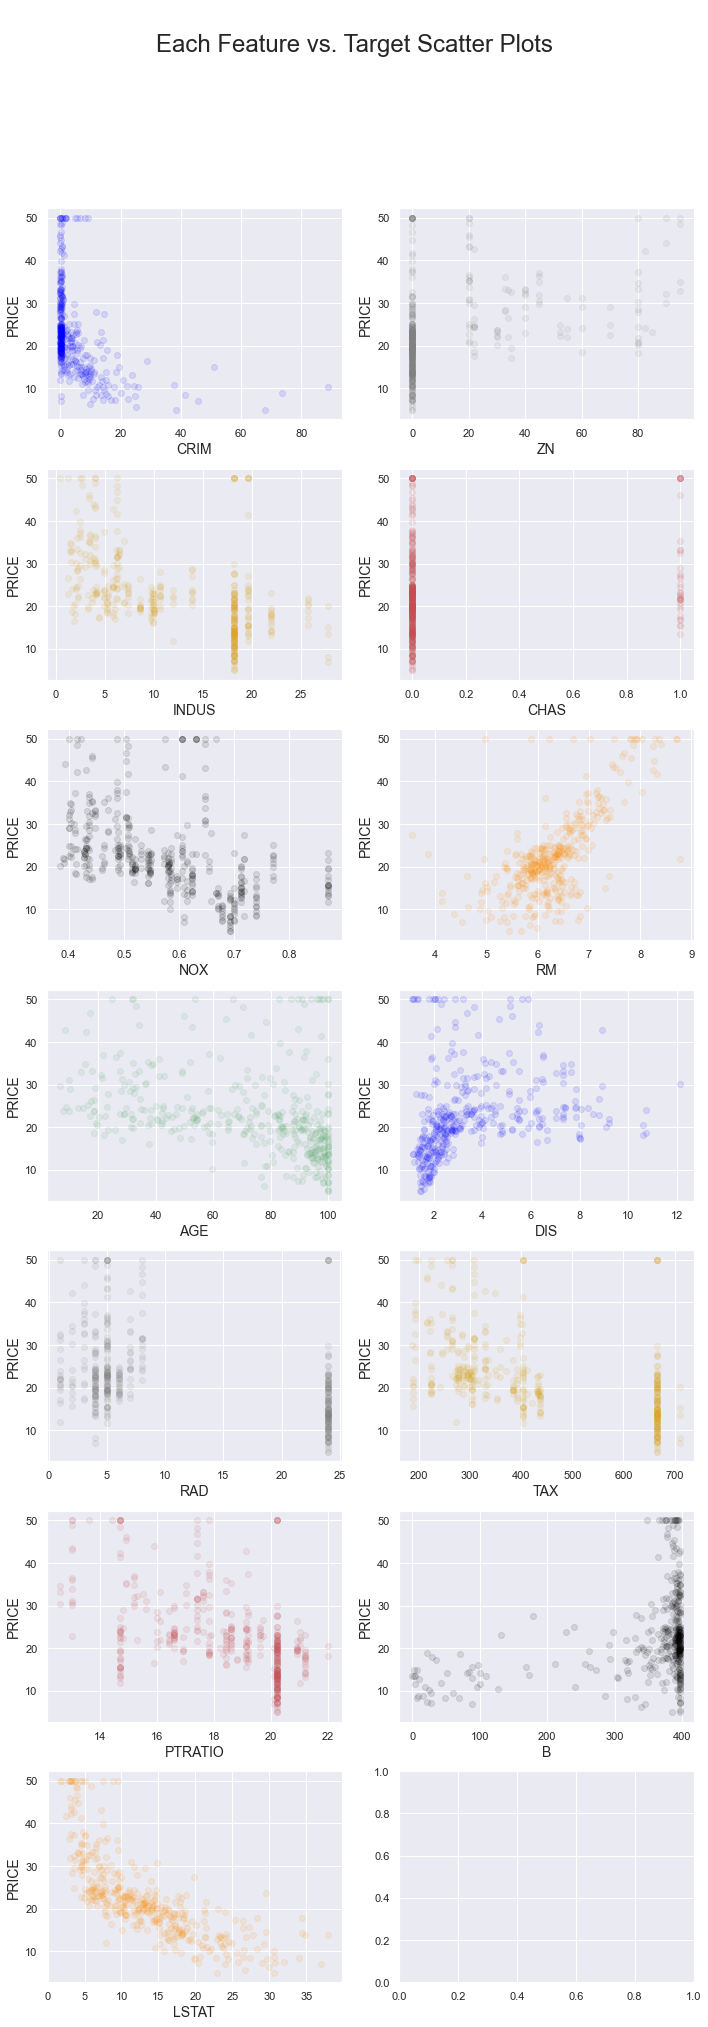

In [14]:
feature_cols = [col for col in df.columns if col != 'PRICE']
gen_scatterplots(df, 'PRICE',
                 feature_cols,
                 2)

<b> Creating new features </b>

In [21]:
# Setting Thresholds

crim_at = 0
zn_at = 0
indus_at = 18.10
indus_lo = 10
nox_lo = 0.5
nox_hi = 0.7
age_hi = 90
dis_lo = 3.75
rad_at = 24
tax_at = 666
ptratio_at = 20.2
ptratio_lo = 20
b_lo = 150
b_at = 396.90
lstat_lo = 10

In [28]:
# Feature Generation

# Hi

df['out_age'] = 0
condition_hi = df.loc[0:,'out_age'][df['AGE'] > age_hi]

df['out_age'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Lo
df['out_dis'] = 0
condition_lo = df.loc[0:,'out_dis'][df['DIS'] < dis_lo]

df['out_dis'].replace(to_replace = condition_lo,
                                 value      = 1,
                                 inplace    = True)
df['out_lstat'] = 0
condition_lo = df.loc[0:,'out_lstat'][df['LSTAT'] < lstat_lo]

df['out_lstat'].replace(to_replace = condition_lo,
                                 value      = 1,
                                 inplace    = True)


# At
df['change_crim'] = 0
condition = df.loc[0:,'change_crim'][df['CRIM'] == crim_at]

df['change_crim'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)
df['change_zn'] = 0
condition = df.loc[0:,'change_zn'][df['ZN'] == zn_at]

df['change_zn'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)


df['change_rad'] = 0
condition = df.loc[0:,'change_rad'][df['RAD'] == rad_at]

df['change_rad'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)

df['change_tax'] = 0
condition = df.loc[0:,'change_tax'][df['TAX'] == tax_at]

df['change_tax'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)

df['out_nox'] = 0
condition_hi = df.loc[0:,'out_nox'][df['NOX'] > nox_hi]
condition_lo = df.loc[0:,'out_nox'][df['NOX'] < nox_lo]

df['out_nox'].replace(to_replace = condition_lo,
                                 value      = 1,
                                 inplace    = True)
df['out_nox'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

df['change_indus'] = 0
condition = df.loc[0:,'change_indus'][df['INDUS'] == indus_at]
condition_lo = df.loc[0:,'change_indus'][df['INDUS'] < indus_lo]

df['change_indus'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)
df['change_indus'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

df['out_b'] = 0
condition = df.loc[0:,'out_b'][df['B'] == b_at]
condition_lo = df.loc[0:,'out_b'][df['B'] < b_lo]

df['out_b'].replace(to_replace = condition,
                                 value      = 1,
                                 inplace    = True)
df['out_b'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

df['out_ptratio'] = 0
condition = df.loc[0:,'out_ptratio'][df['PTRATIO'] == ptratio_at]
condition_lo = df.loc[0:,'out_ptratio'][df['PTRATIO'] < ptratio_lo]

df['out_ptratio'].replace(to_replace = condition,
                                 value      = 1,
                                 inplace    = True)
df['out_ptratio'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

### Model Creation

In [26]:
# Target Generation
# Creating log and inverse values for PRICE

df['log_PRICE'] = np.log(df['PRICE'])

df['inv_PRICE'] = (1/df['PRICE'])

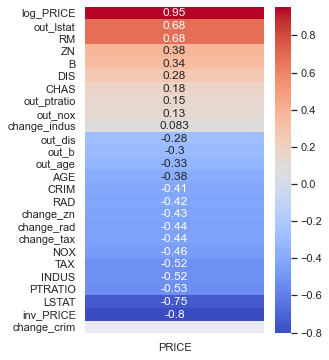

In [29]:
# Corr with new features
corr_to_target(df, 'PRICE')

<b> Train/Test Split - Scaling the data </b>

In [66]:
# declaring set of x-variables
x_var = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
         'TAX', 'PTRATIO', 'B', 'LSTAT', 'out_age', 'out_dis',
         'out_lstat', 'change_crim', 'change_zn', 'change_rad', 'change_tax',
         'out_nox', 'change_indus', 'out_b', 'out_ptratio']

x_var_new = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD',
         'TAX', 'PTRATIO', 'B', 'LSTAT', 'out_dis',
         'out_lstat', 'change_rad', 'change_tax',
         'out_nox','out_b']

In [67]:
# Preparing a DataFrame to scale the data and use for train/test split
data   = df.loc[ : , x_var_new]


# Preparing the target variable
target = df.loc[:, 'log_PRICE']

In [68]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# renaming column to concatenate
X_scaled_df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD',
         'TAX', 'PTRATIO', 'B', 'LSTAT', 'out_dis',
         'out_lstat', 'change_rad', 'change_tax',
         'out_nox','out_b']

# checking the results
X_scaled_df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,out_dis,out_lstat,change_rad,change_tax,out_nox,out_b
count,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.47,-0.48,-1.67,-0.31,-1.61,-3.67,-1.10,-1.08,-1.43,-2.56,-3.50,-1.54,-1.49,-0.82,-0.70,-0.70,-0.91,-0.68
25%,-0.46,-0.48,-0.90,-0.31,-0.74,-0.56,-0.71,-0.76,-0.83,-0.66,0.21,-0.80,-1.49,-0.82,-0.70,-0.70,-0.91,-0.68
50%,-0.43,-0.48,-0.04,-0.31,-0.00,-0.09,-0.39,-0.65,-0.23,0.31,0.41,-0.14,0.67,-0.82,-0.70,-0.70,-0.91,-0.68
75%,0.12,-0.48,0.83,-0.31,0.78,0.47,0.43,1.42,1.31,0.80,0.46,0.58,0.67,1.22,1.44,1.44,1.10,1.48
max,8.97,3.58,2.19,3.25,2.49,3.33,4.11,1.42,1.56,1.60,0.48,3.36,0.67,1.22,1.44,1.44,1.10,1.48


In [69]:
# running train/test split again
X_train, X_test, y_train, y_test = train_test_split(
            X_scaled_df,
            target,
            test_size = 0.25,
            random_state = 222)

In [70]:
# formatting each explanatory variable for statsmodels
for val in X_scaled_df:
    print(f"df['{val}'] +")

df['CRIM'] +
df['ZN'] +
df['INDUS'] +
df['CHAS'] +
df['NOX'] +
df['RM'] +
df['DIS'] +
df['RAD'] +
df['TAX'] +
df['PTRATIO'] +
df['B'] +
df['LSTAT'] +
df['out_dis'] +
df['out_lstat'] +
df['change_rad'] +
df['change_tax'] +
df['out_nox'] +
df['out_b'] +


<b> Building a base statsmodel </b>

In [71]:
# building a ols stat model

# blueprinting a model type
lm_full = smf.ols(formula = """df['log_PRICE'] ~ df['CRIM'] +
df['ZN'] +
df['INDUS'] +
df['CHAS'] +
df['NOX'] +
df['RM'] +
df['DIS'] +
df['RAD'] +
df['TAX'] +
df['PTRATIO'] +
df['B'] +
df['LSTAT'] +
df['out_dis'] +
df['out_lstat'] +
df['change_rad'] +
df['change_tax'] +
df['out_nox'] +
df['out_b']""",
                               data = df)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        df['log_PRICE']   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     93.47
Date:                Sun, 06 Sep 2020   Prob (F-statistic):          2.28e-125
Time:                        13:44:10   Log-Likelihood:                 89.820
No. Observations:                 405   AIC:                            -143.6
Df Residuals:                     387   BIC:                            -71.57
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.3295      0.239     18.111      0.000       3.860       4.800
df['CRIM']          -0.0094      0.001     -6.623      0.000      -0.012      -0.007
df['ZN']             0.0015      0.001      2.075      0.039    8.08e-05       0.003
df['INDUS']          0.0055      0.003      1.865      0.063      -0.000       0.011
df['CHAS']           0.0814      0.037      2.216      0.027       0.009       0.154
df['NOX']           -1.0874      0.187     -5.818      0.000      -1.455      -0.720
df['RM']             0.0579      0.018      3.134      0.002       0.022       0.094
df['DIS']           -0.0571      0.012     -4.906      0.000      -0.080      -0.034
df['RAD']            0.0238      0.008      2.872      0.004       0.007       0.040
df['TAX']           -0.0007      0.000     -3.986      0.000      -0.001      -0.000
df['PTRATIO']       -0.0349      0.007     -5.341      0.000      -0.048      -0.022
df['B']              0.0003      0.000      2.860      0.004       0.000       0.001
df['LSTAT']         -0.0285      0.003    -11.379      0.000      -0.033      -0.024
df['out_dis']        0.0924      0.045      2.061      0.040       0.004       0.181
df['out_lstat']      0.0717      0.034      2.112      0.035       0.005       0.138
df['change_rad']    -0.0936      0.080     -1.168      0.244      -0.251       0.064
df['change_tax']    -0.0936      0.080     -1.168      0.244      -0.251       0.064
df['out_nox']        0.0615      0.029      2.134      0.033       0.005       0.118
df['out_b']         -0.0655      0.024     -2.714      0.007      -0.113      -0.018
==============================================================================
Omnibus:                       31.037   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.168
Skew:                           0.319   Prob(JB):                     1.94e-19
Kurtosis:                       5.168   Cond. No.                     8.19e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  2e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<b> Linear Model

In [72]:
# Linear Model
# INSTANTIATING a model object
lr = sklearn.linear_model.LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print('Training Score:', lr.score(X_train, y_train).round(4))
print('Testing Score:',  lr.score(X_test, y_test).round(4))


# saving scoring data for future use
lr_train_score = lr.score(X_train, y_train).round(4)
lr_test_score  = lr.score(X_test, y_test).round(4)

Training Score: 0.8075
Testing Score: 0.7768


<b> Ridge Model with CV

In [74]:
# Ridge Model with CV and parameter tuning (alpha)
# INSTANTIATING a model object
ridge_model = sklearn.linear_model.RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10, 100], cv=3)

# FITTING the training data
ridge_fit = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_model.predict(X_test)

print('Training Score:', ridge_model.score(X_train, y_train).round(4))
print('Testing Score:',  ridge_model.score(X_test, y_test).round(4))
print('Alpha:', ridge_model.alpha_)

# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

Training Score: 0.8075
Testing Score: 0.7767
Alpha: 0.1


<b> Elastic Model with CV

In [75]:
# Elastic Model with CV = 3
# INSTANTIATING a model object
elastic_model = sklearn.linear_model.ElasticNetCV(cv=3)

# FITTING the training data
elastic_fit = elastic_model.fit(X_train, y_train)


# PREDICTING on new data
elastic_pred = elastic_model.predict(X_test)

print('Training Score:', elastic_model.score(X_train, y_train).round(4))
print('Testing Score:',  elastic_model.score(X_test, y_test).round(4))

# saving scoring data for future use
elastic_train_score = elastic_model.score(X_train, y_train).round(4)
elastic_test_score  = elastic_model.score(X_test, y_test).round(4)

Training Score: 0.8072
Testing Score: 0.7757


<b> KNN Model

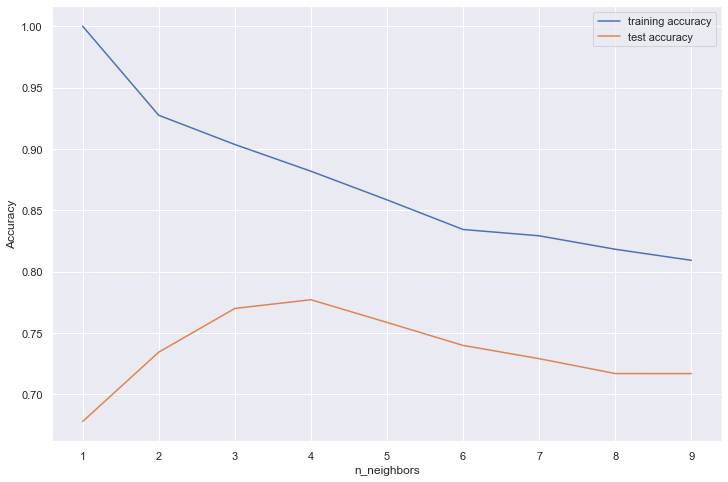

The optimal number of neighbors is 4
Training Score: 0.8818
Testing Score: 0.777


In [76]:
# KNN Model

# First part to find optimal k

# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 10 neighbors
neighbors_settings = range(1, 10)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

# second part - model

# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_opt.fit(X_train, y_train)



# PREDITCING on new data
knn_opt_pred = knn_opt.predict(X_test)



# SCORING the results
print('Training Score:', knn_opt.score(X_train, y_train).round(4))
print('Testing Score:',  knn_opt.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_opt_score_train = knn_opt.score(X_train, y_train).round(4)
knn_opt_score_test  = knn_opt.score(X_test, y_test).round(4)

<b> Gradient Boosting Model

In [87]:
# Gradient Boosting Model
# Instantiate a GradientBoostingRegressor 'gbt'
gbt = GradientBoostingRegressor(n_estimators=100, max_depth=3,random_state=222)

# Fit 'gbt' to the training set
gbt.fit(X_train, y_train)

# Predict the test set labels
gbt_pred = gbt.predict(X_test)

print('Training Score:', gbt.score(X_train, y_train).round(4))
print('Testing Score:',  gbt.score(X_test, y_test).round(4))


# saving scoring data for future use
gbt_train_score = gbt.score(X_train, y_train).round(4)
gbt_test_score  = gbt.score(X_test, y_test).round(4)

Training Score: 0.981
Testing Score: 0.873


<b> Random Forrest

In [83]:
# Random Forrent Model
# Instantiate a random forests regressor 'rf'
rf = RandomForestRegressor(random_state= 222)

# Fit 'grid_rf' to the training set
rf.fit(X_train, y_train)

# Predict the test set labels
rf_pred = rf.predict(X_test)

print('Training Score:', rf.score(X_train, y_train).round(4))
print('Testing Score:',  rf.score(X_test, y_test).round(4))


# saving scoring data for future use
rf_train_score = rf.score(X_train, y_train).round(4)
rf_test_score  = rf.score(X_test, y_test).round(4)

Training Score: 0.9805
Testing Score: 0.8644


### Model Performance

In [90]:
# Model Performance

print(f"""
Model                 Train Score      Test Score
----------------      ----------       ----------
Linear                {lr_train_score}           {lr_test_score}
Ridge                 {ridge_train_score}           {ridge_test_score}
ElasticNet            {elastic_train_score}           {elastic_test_score}
KNN                   {knn_opt_score_train}           {knn_opt_score_test}
Gradient Boosting     {gbt_train_score}            {gbt_test_score}
Random Forrest        {rf_train_score}           {rf_test_score}

OLS R-Squared = 0.804

Gradient Boosting and Random Forrest are the best Models.
They have higher Testing scores, although slightly over-fitted.

""")


Model                 Train Score      Test Score
----------------      ----------       ----------
Linear                0.8075           0.7768
Ridge                 0.8075           0.7767
ElasticNet            0.8072           0.7757
KNN                   0.8818           0.777
Gradient Boosting     0.981            0.873
Random Forrest        0.9805           0.8644

OLS R-Squared = 0.804

Gradient Boosting and Random Forrest are the best Models.
They have higher Testing scores, although slightly over-fitted.


